In [1]:
import matplotlib.pyplot as plt
from sympy import lambdify, Symbol
import math
import numpy as np

In [2]:
def F(x):
    return math.cosh(math.sin(x))

In [3]:
def F1(x):
    return (math.cos(x))*(math.sinh(math.sin(x)))

In [4]:
def F2(x):
    return (math.cos(x)*math.cos(x))*(math.cosh(math.sin(x))) - (math.sin(x)*math.sinh(math.sin(x)))

In [5]:
#print('input count of points')
#n = int(input())

n=10
X, h = np.linspace(-1.5, 1.5, n, retstep=True)
Y = list()
for i in range(n):
    Y.append(F(X[i])) 

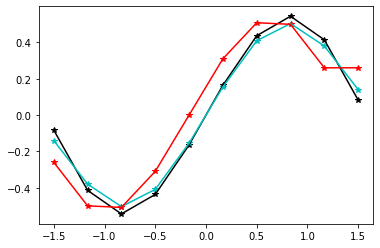

In [6]:
d1_right = list() #первые производные, правые разности
d1_centr = list() #первые производные,  центральные разности

#Первые производные, правая разность
for i in range(n-1):
    d1_right.append((Y[i+1]-Y[i])/h)
d1_right.append(d1_right[n-2])
#первые производные, центральная разность

#для самой левой точки
d1_centr.append((1/(2*h))*(-3*Y[0]+4*Y[1]-Y[2]))

for i in range(1,n-1):
    d1_centr.append((Y[i+1]-Y[i-1])/(2*h))
#для самой левой точки
m = n -1
d1_centr.append((1/(2*h))*(3*Y[m]-4*Y[m-1]+Y[m-2]))
    

d1 = list()
for i in range(n):
    d1.append(F1(X[i]))

plt.plot(X, d1, 'k*')#производная
plt.plot(X, d1_centr,'c*')#центральная
plt.plot(X, d1_right,'r*') #правая
plt.plot(X, d1, 'k')
plt.plot(X, d1_centr,'c')
plt.plot(X, d1_right,'r') 
plt.show()


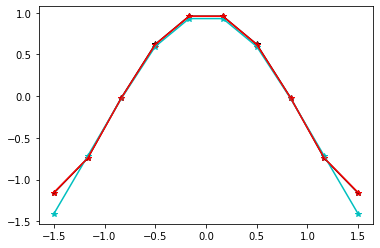

In [10]:
d2_centr2 = list() #вторые производные, второй порядок, центральные разности
d2_centr4 = list() #вторые производные, четвертый порядок, центральные разности

#второй порядок точности
d2_centr2.append((2*Y[0]-5*Y[1]+4*Y[2]-Y[3])/(h**2))

for i in range(1,n-1):
    d2_centr2.append((Y[i+1]-2*Y[i]+Y[i-1])/(h**2))
    
m = n-1
d2_centr2.append(( -Y[m-3]+4*Y[m-2]-5*Y[m-1] +2*Y[m])/(h**2))

#четвертый порядок точности
#X4 = list()
#for i in range(2,n-2):
#    d2_centr4.append((-Y[i+2]+16*Y[i+1]-30*Y[i]+16*Y[i-1]-Y[i-2])/(12*(h**2)))
#    X4.append(X[i])
    
for i in range(n):
    d2_centr4.append((-F(X[i]+2*h)+16*F(X[i]+h)-30*F(X[i])+16*F(X[i]-h)-F(X[i]-2*h))/(12*(h**2)))

d2 = list()
for i in range(n):
    d2.append(F2(X[i]))
    
plt.plot(X, d2, 'k*')#производная
plt.plot(X, d2_centr2,'c*')#2
plt.plot(X, d2_centr4,'r*') #правая
plt.plot(X, d2, 'k')
plt.plot(X, d2_centr2,'c')
plt.plot(X, d2_centr4,'r') 
plt.show()


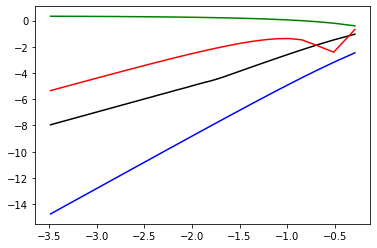

In [12]:
diff1_c_list = list()
diff1_r_list = list()
diff2_2_list = list()
diff2_4_list = list()
h_list = list()
    
for n in range(5, 100):
    X, h = np.linspace(-1.5, 1.5, n, retstep=True)
    Y = list()
    for i in range(n):
        Y.append(math.cosh(math.sin(X[i]))) 
    h_list.append(math.log(h))

    d1_right = list() #первые производные, правые разности
    d1_centr = list() #первые производные,  центральные разности

    #Первые производные, правая разность
    for i in range(n-1):
        d1_right.append((Y[i+1]-Y[i])/h)
    d1_right.append(X[n-2])
        

    #первые производные, центральная разность
    #для самой левой точки
    d1_centr.append((1/(2*h))*(-3*Y[0]+4*Y[1]-Y[2]))

    for i in range(1,n-1):
        d1_centr.append((Y[i+1]-Y[i-1])/(2*h))
    #для самой левой точки
    m = n-1
    d1_centr.append((1/(2*h))*(3*Y[m]-4*Y[m-1]+Y[m-2]))
    
    diff_r = 0
    for i in range(n):
        if math.fabs(F1(X[i]) - d1_right[i]) > diff_r:
            diff_r = math.fabs(F1(X[i]) - d1_right[i])
    diff_c = 0
    for i in range(n):
        if math.fabs(F1(X[i]) - d1_centr[i]) > diff_c:
            diff_c = math.fabs(F1(X[i]) - d1_centr[i])
    diff1_c_list.append(math.log(diff_c))
    diff1_r_list.append(math.log(diff_r))
    
    #################################################################################3
    
    d2_centr2 = list() #вторые производные, второй порядок, центральные разности
    d2_centr4 = list() #вторые производные, четвертый порядок, центральные разности

    #второй порядок точности
    d2_centr2.append((2*Y[0]-5*Y[1]+4*Y[2]-Y[3])/(h**2))

    for i in range(1,n-1):
        d2_centr2.append((Y[i+1]-2*Y[i]+Y[i-1])/(h**2))
    
    m = n-1
    d2_centr2.append(( -Y[m-3]+4*Y[m-2]-5*Y[m-1] +2*Y[m])/(h**2))

    #четвертый порядок точности 
    for i in range(n):
        d2_centr4.append((-F(X[i]+2*h)+16*F(X[i]+h)-30*F(X[i])+16*F(X[i]-h)-F(X[i]-2*h))/(12*(h**2)))
       
    diff2_2 = 0
    for i in range(n):
        if math.fabs(F2(X[i]) - d2_centr2[i]) > diff2_2:
            diff2_2 = math.fabs(F2(X[i]) - d2_centr2[i])
    diff2_4 = 0
    for i in range(n):
        if math.fabs(F2(X[i]) - d2_centr4[i]) > diff2_4:
            diff2_4 = math.fabs(F2(X[i]) - d2_centr4[i])
            
    diff2_2_list.append(math.log(diff2_2))
    diff2_4_list.append(math.log(diff2_4))
    
plt.plot(h_list, diff1_c_list, 'k')#первая центральная (черный)
#plt.show()
plt.plot(h_list, diff1_r_list,'g')#первая правая (зеленый)
#plt.show()
plt.plot(h_list, diff2_2_list,'r') #вторая 2 точности (красный)
#plt.show()
plt.plot(h_list, diff2_4_list, 'b')#вторая 4 точности (синий)
plt.show()



        
